# Money Supply in the US

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import joblib

## Import

In [2]:
# Read data
m2 = pd.read_csv("/Users/anoop/Downloads/project_2_data/M2.csv")

# Convert 'observation_date 'to datetime and assign to 'Date'
m2["Date"] = pd.to_datetime(m2["observation_date"])

# Drop the 'observation_date' column
m2.drop(columns=["observation_date"], inplace=True)

# Rename column
m2.rename(columns={"M2SL": "M2"}, inplace=True)

# Set 'Date' as the index
m2.set_index('Date', inplace=True)

# Create a new column for lagged GDP values and remove any resulting missing data.
m2["M2_L1"] = m2["M2"].shift(1)
m2.dropna(inplace = True)

# Assign `m2` to `df`
df = m2

print("df type:", type(df))
print()
print(df.info())
df.head()

df type: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 1961-01-01 to 2023-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M2      63 non-null     float64
 1   M2_L1   63 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB
None


,M2,M2_L1
Date,,
1961-01-01,324.8,304.3
1962-01-01,350.1,324.8
1963-01-01,379.6,350.1
1964-01-01,409.3,379.6
1965-01-01,442.5,409.3


## Explore

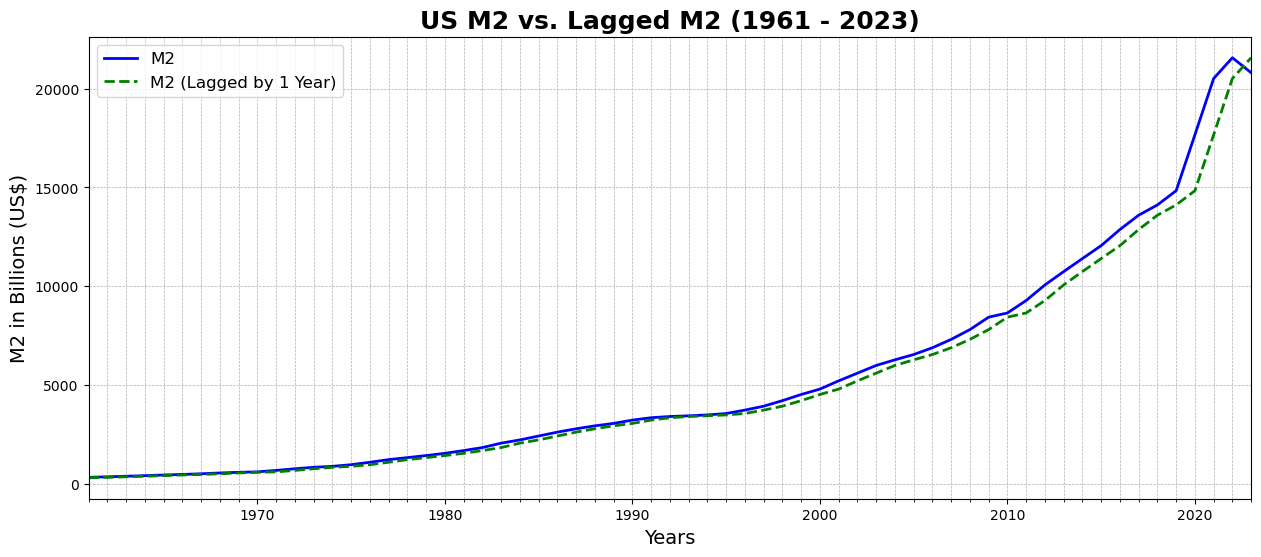

In [3]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot `M2` and `M2_L1` with different colors
df["M2"].plot(ax=ax, color="blue", linewidth=2, label="M2")
df["M2_L1"].plot(ax=ax, color="green", linewidth=2, linestyle='--', label="M2 (Lagged by 1 Year)")

# Title and labels
plt.title("US M2 vs. Lagged M2 (1961 - 2023)", fontsize=18, fontweight="bold")
plt.xlabel("Years", fontsize=14)
plt.ylabel("M2 in Billions (US$)", fontsize=14)

# Format x-axis ticks for better readability (showing every 10 years)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

# Add grid for better readability
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Add a legend to differentiate `M2` and `M2_L1`
plt.legend(loc="upper left", fontsize=12)

# Show the plot
plt.show()

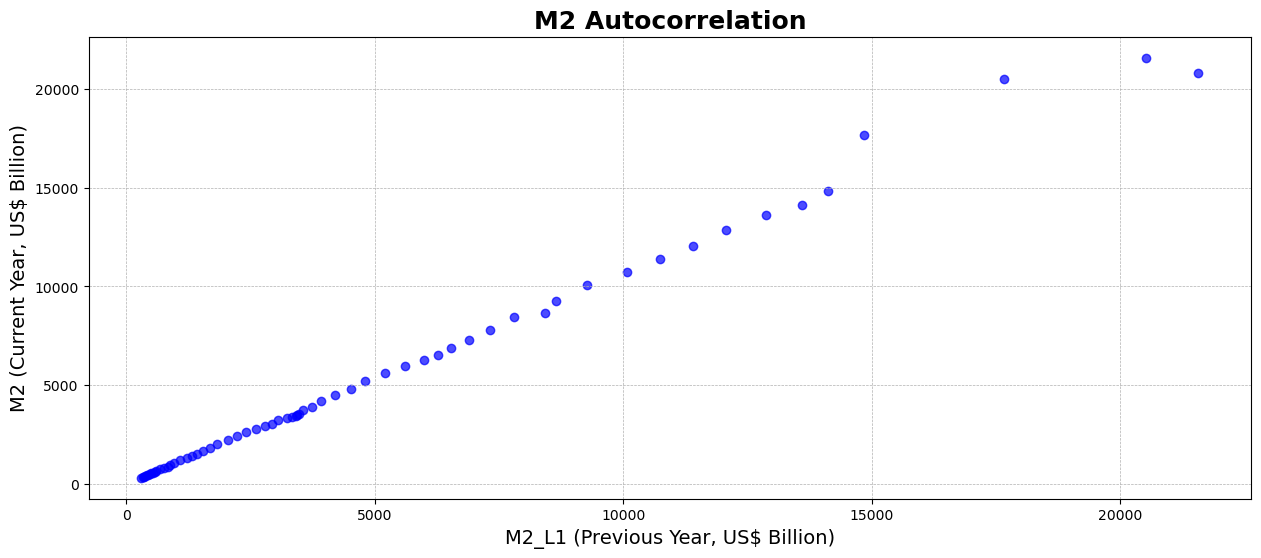

In [4]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Scatter plot 
plt.scatter(x=df["M2_L1"], y=df["M2"], color="b", alpha=0.7)

# Title and labels
plt.title("M2 Autocorrelation", fontsize=18, fontweight="bold")
plt.xlabel("M2_L1 (Previous Year, US$ Billion)", fontsize=14)
plt.ylabel("M2 (Current Year, US$ Billion)", fontsize=14)

# Add grid for better readability
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()

## Split

In [5]:
target = "M2"
feature = ["M2_L1"]

X_train = df[feature]
y_train = df[target]

print("Number of Feature observations :", len(X_train))
print("Number of Target observations :", len(y_train))

Number of Feature observations : 63
Number of Target observations : 63


# Model Building

## Baseline

In [6]:
# Mean Absolute Error baseline
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Baseline Mean Absolute Error : ", round(mae_baseline, 2))

Baseline Mean Absolute Error :  4298.93


## Iterate

In [7]:
# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Calculate the Mean Absolute Error for the true 'y_train' values and the corresponding predictions by the model.
mae = mean_absolute_error(y_train, model.predict(X_train))
print("Mean Absolute Error :" , round(mae, 2))

Mean Absolute Error : 154.48


In [9]:
# Dataframe containing true 'y' values and predicted 'y' values
data = pd.DataFrame({
    "y_train": y_train,  
    "y_pred": model.predict(X_train)  # Predicted values from the model
}, index=y_train.index)  # Retain the original index from y_train

print("data type:", type(data))
print()
print(data.info())
data.head()

data type: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 1961-01-01 to 2023-01-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   y_train  63 non-null     float64
 1   y_pred   63 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB
None


,y_train,y_pred
Date,,
1961-01-01,324.8,344.004818
1962-01-01,350.1,365.747375
1963-01-01,379.6,392.580872
1964-01-01,409.3,423.868942
1965-01-01,442.5,455.369135


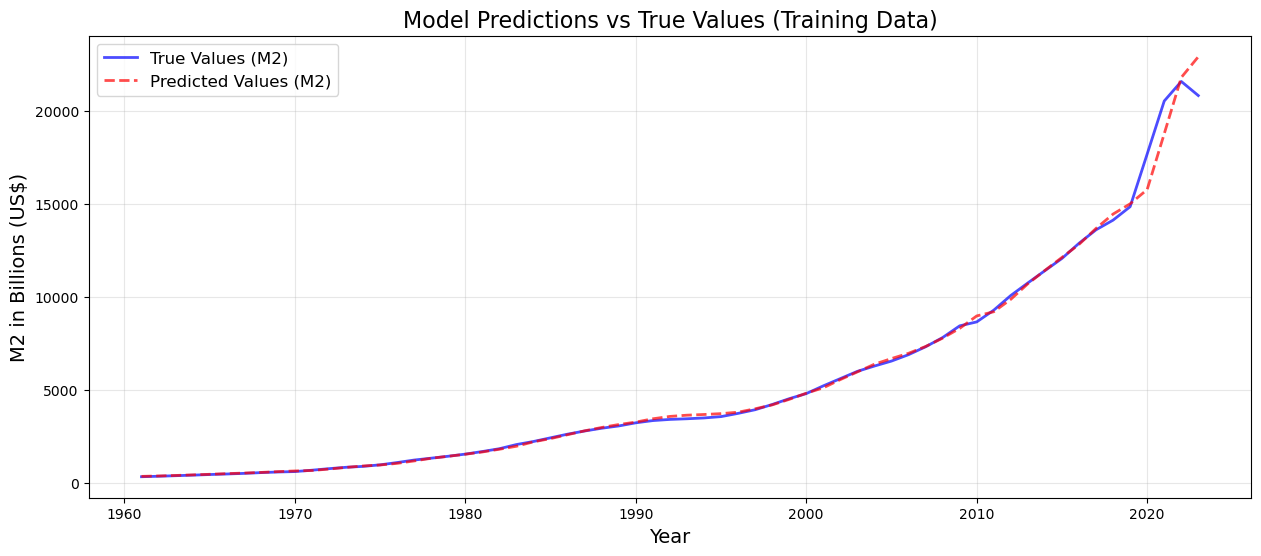

In [10]:
# Create the figure and axis
plt.figure(figsize=(15, 6))

# Plot true `y_train` values
plt.plot(data.index, data["y_train"], label="True Values (M2)", color="blue", linewidth=2, alpha=0.7)

# Plot predicted `y` values
plt.plot(data.index, data["y_pred"], label="Predicted Values (M2)", color="red", linestyle="--", linewidth=2, alpha=0.7)

# Add title, labels, and legend
plt.title("Model Predictions vs True Values (Training Data)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("M2 in Billions (US$)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

In [11]:
# Save the model as a pickle file
joblib.dump(model, "m2_model.pkl")

['m2_model.pkl']

# Communicate results

In [12]:
intercept = model.intercept_
coefficient = model.coef_[0]

# Communicate results
print("### Linear Regression Model Summary ###")
print()
print(f"The trained linear regression model is as follows:")
print()
print(f"    M2 = {intercept:.2f} + ({coefficient:.6f}) * M2 (previous_year)")
print()
print("Key Points:")
print(f"- The intercept is {intercept:.2f}, which represents the baseline M2 when M2 (previous_year) is zero.")
print(f"- The coefficient is {coefficient:.6f}, indicating that for every one-unit increase in M2 (previous_year), the M2 is expected to increase by approximately {coefficient:.6f} units.")
print()
print("The model has been successfully trained and shows a clear linear relationship between M2 (next_year) and M2 (previous_year).")

### Linear Regression Model Summary ###

The trained linear regression model is as follows:

    M2 = 21.26 + (1.060613) * M2 (previous_year)

Key Points:
- The intercept is 21.26, which represents the baseline M2 when M2 (previous_year) is zero.
- The coefficient is 1.060613, indicating that for every one-unit increase in M2 (previous_year), the M2 is expected to increase by approximately 1.060613 units.

The model has been successfully trained and shows a clear linear relationship between M2 (next_year) and M2 (previous_year).


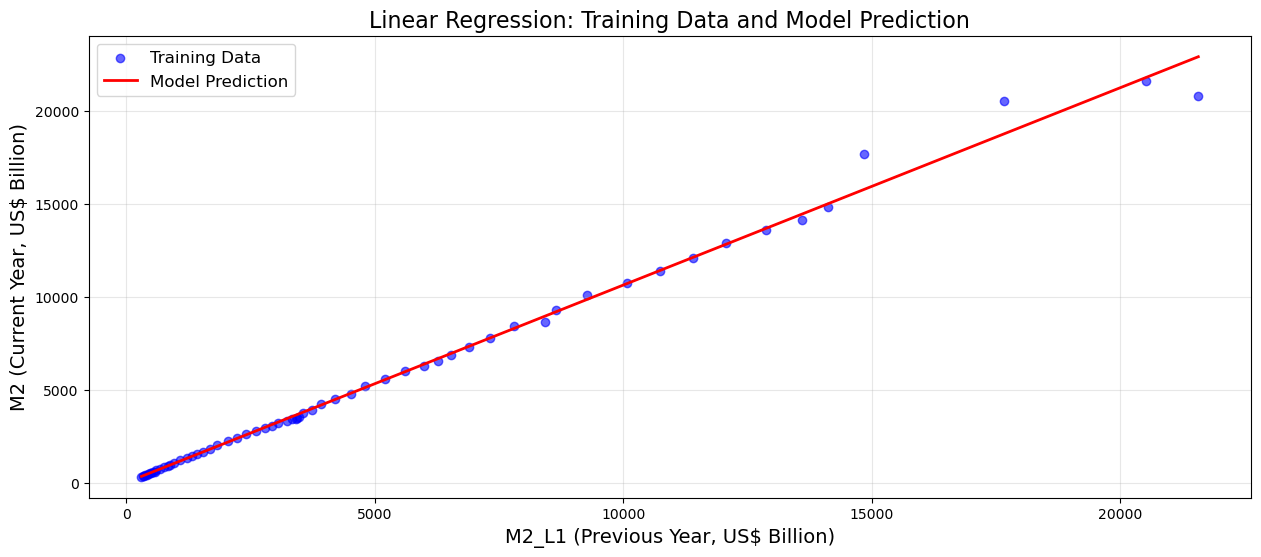

In [13]:
# Create the figure and axis
plt.figure(figsize=(15, 6))

# Scatter plot 
plt.scatter(X_train, y_train, color="blue", alpha=0.6, label="Training Data")

# Line plot for the model's predictions
plt.plot(X_train, model.predict(X_train), color="red", linewidth=2, label="Model Prediction")

# Add labels, title, and legend
plt.title("Linear Regression: Training Data and Model Prediction", fontsize=16)
plt.xlabel("M2_L1 (Previous Year, US$ Billion)", fontsize=14)
plt.ylabel("M2 (Current Year, US$ Billion)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()